In [4]:
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import random
from numba import jit
pd.set_option('display.max_columns', 50)

adj_jpm = pd.DataFrame.from_csv('adjJPM.csv')
del adj_jpm['Close']
display(adj_jpm.head())

,Open,High,Low,Volume,Adj Close
1983-12-30,2.602623,2.632198,2.573048,3.575624e+06,2.602623
1984-01-03,2.598926,2.617409,2.580440,6.517272e+06,2.602623
1984-01-04,2.652532,2.713529,2.617410,4.945011e+06,2.713529
1984-01-05,2.768984,2.802256,2.735712,5.817363e+06,2.802256
1984-01-06,2.772681,2.802256,2.743106,3.286531e+06,2.772681


In [6]:
cv_set = adj_jpm[datetime(2006, 9, 25):datetime(2011, 9, 27)]
test_set = adj_jpm[datetime(2011, 9, 26):]

# print(len(training_set))
print(len(cv_set))
print(len(test_set))

1262
1260


1260
1261


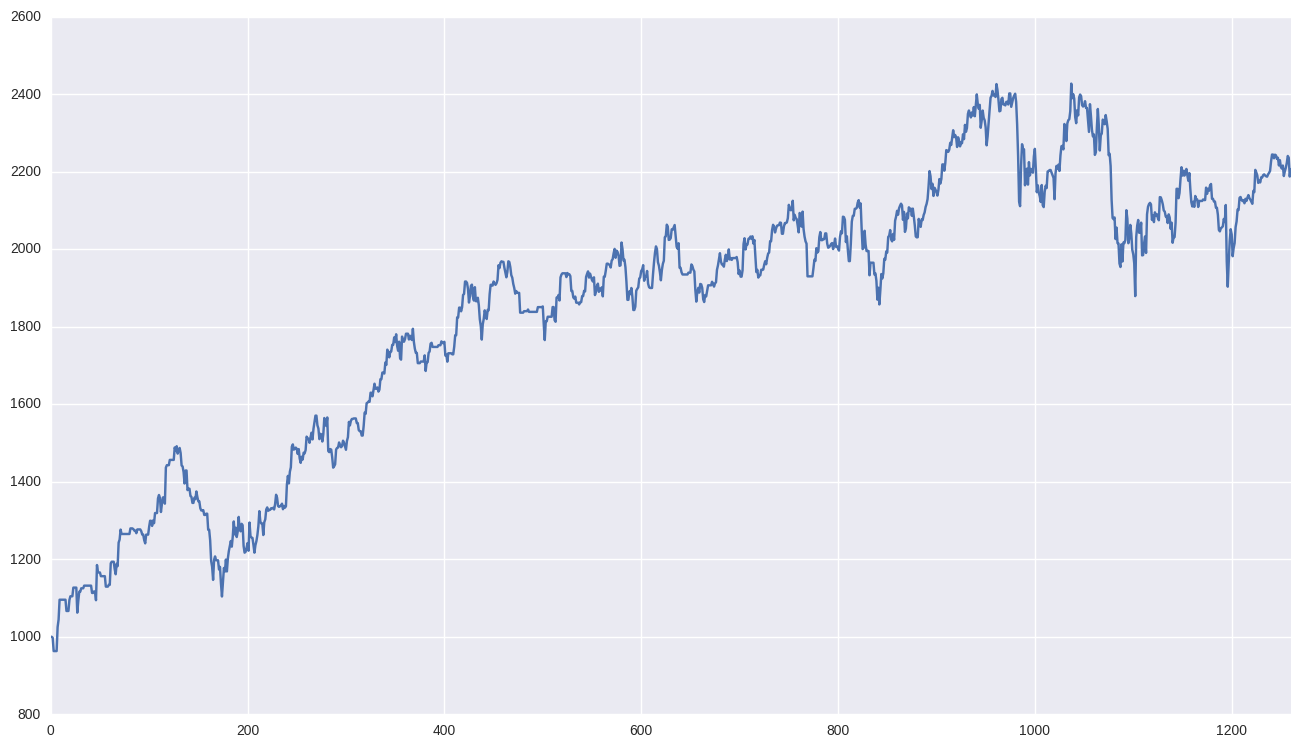

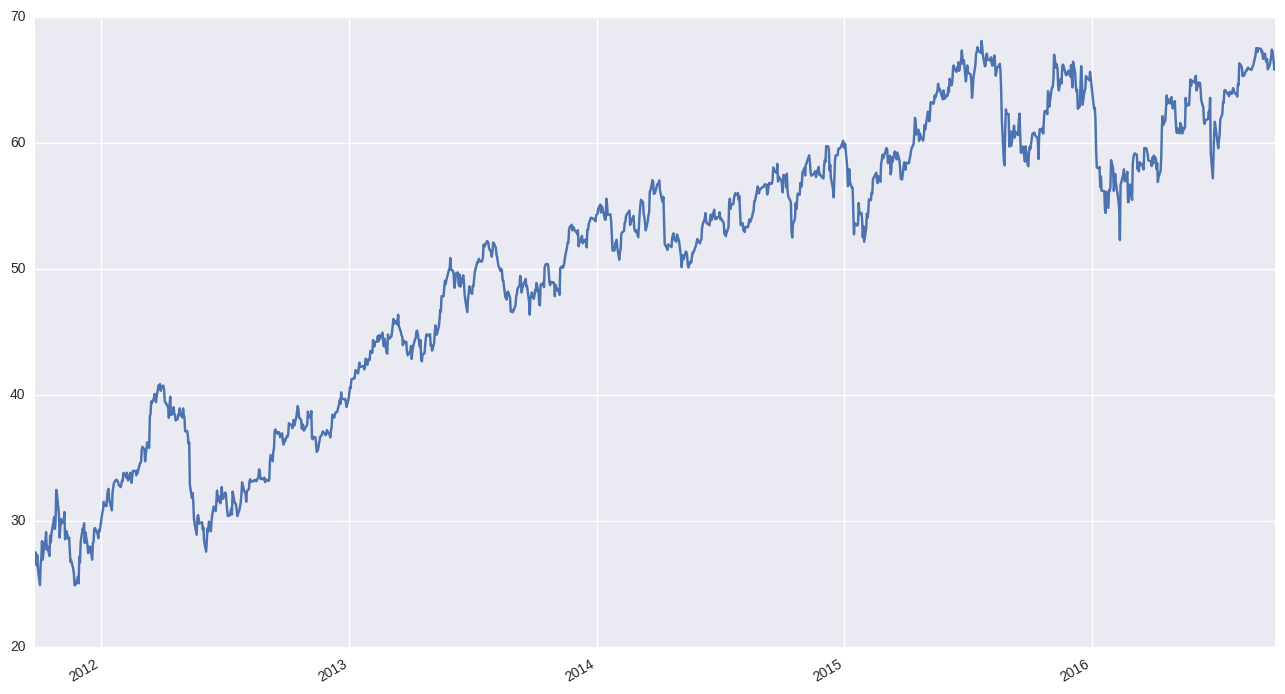

In [54]:
test_pv_history = [1000.0, 997.49836000000005, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 1025.0354599999998, 1044.348352, 1095.6274519999997, 1095.6274519999997, 1095.6274519999997, 1095.6274519999997, 1095.6274519999997, 1095.6274519999997, 1095.6274519999997, 1066.5792769999998, 1066.5792769999998, 1066.5792769999998, 1095.1105319999999, 1104.5127500000001, 1104.5127500000001, 1104.5127500000001, 1126.8837640000002, 1126.8837640000002, 1126.8837640000002, 1126.8837640000002, 1062.215344, 1092.3676800000003, 1116.3598860000002, 1116.3598860000002, 1125.1137900000001, 1125.1137900000001, 1125.1137900000001, 1131.9486960000002, 1131.9486960000002, 1131.9486960000002, 1131.9486960000002, 1131.9486960000002, 1131.9486960000002, 1131.9486960000002, 1131.9486960000002, 1113.1089770000001, 1113.1089770000001, 1116.964565, 1116.964565, 1094.3568850000001, 1185.1643280000003, 1165.9478000000001, 1165.9478000000001, 1165.9478000000001, 1156.3790330000004, 1156.3790330000004, 1156.3790330000004, 1156.3790330000004, 1156.3790330000004, 1129.4338330000005, 1129.4338330000005, 1129.4338330000005, 1133.9903930000003, 1133.9903930000003, 1189.5631130000004, 1193.6114930000001, 1193.6114930000001, 1193.6114930000001, 1174.6841330000002, 1161.3649730000002, 1188.3538530000003, 1182.3953330000002, 1243.0328930000003, 1250.7996130000004, 1276.5707330000002, 1265.2738130000002, 1265.2738130000002, 1265.2738130000002, 1265.2738130000002, 1265.2738130000002, 1265.2738130000002, 1265.2738130000002, 1265.2738130000002, 1265.2738130000002, 1279.6950790000003, 1279.6950790000003, 1279.6950790000003, 1277.6827510000003, 1273.9937110000003, 1273.9937110000003, 1267.2861030000001, 1277.0121270000002, 1277.0121270000002, 1277.0121270000002, 1277.0121270000002, 1272.4404070000001, 1263.6234920000004, 1263.6234920000004, 1249.2552450000005, 1241.0914540000003, 1263.6234920000004, 1263.6234920000004, 1263.6234920000004, 1283.7461260000005, 1299.5089060000003, 1299.1734800000004, 1286.0937660000004, 1300.1796820000006, 1293.1366480000004, 1319.2962280000004, 1319.2962280000004, 1319.2962280000004, 1357.1938560000001, 1365.9137540000004, 1358.200096, 1321.9792180000002, 1343.1080540000003, 1359.5414960000001, 1359.5414960000001, 1343.5405130000004, 1436.6078710000002, 1442.8124380000004, 1442.8124380000004, 1442.8124380000004, 1456.4746900000002, 1456.4746900000002, 1456.4746900000002, 1456.4746900000002, 1456.4746900000002, 1488.565018, 1479.6686979999999, 1491.7423420000002, 1472.6786860000002, 1482.5282500000001, 1487.294218, 1474.1820099999998, 1441.8816220000001, 1439.642998, 1425.2516740000001, 1395.5096979999998, 1429.089346, 1429.089346, 1378.4089260000001, 1382.1400659999999, 1382.1400659999999, 1363.1737409999998, 1360.9973009999997, 1345.4511759999998, 1345.4511759999998, 1358.8208609999999, 1355.0898259999999, 1374.9888659999999, 1360.6864309999999, 1349.4931859999997, 1349.4931859999997, 1331.6728679999994, 1325.9340419999994, 1325.9340419999994, 1326.8667919999996, 1314.4299269999997, 1314.4299269999997, 1317.6280589999997, 1317.6280589999997, 1276.0532989999997, 1276.0532989999997, 1249.0295749999996, 1196.0217109999996, 1180.7776639999997, 1146.8248099999998, 1198.7933239999998, 1207.4547169999998, 1197.4075759999996, 1197.4075759999996, 1197.4075759999996, 1173.5996959999993, 1180.3512559999995, 1136.9996959999994, 1103.9530159999995, 1139.1316959999995, 1177.5084559999996, 1168.2696559999997, 1199.1842559999996, 1168.6249359999993, 1202.3822959999995, 1221.2152959999996, 1233.6522959999995, 1247.1551359999996, 1232.5861759999996, 1259.5921359999995, 1297.6135359999994, 1264.2114559999995, 1281.2678959999996, 1257.4600159999995, 1271.3182959999995, 1309.3396959999995, 1277.3591359999996, 1272.0289759999994, 1291.5726559999996, 1287.9897759999994, 1234.2442959999996, 1217.0457759999995, 1219.1954959999996, 1229.5862959999995, 1241.7686159999996, 1222.0619759999995, 1294.7974959999997, 1259.6837759999996, 1256.1008159999997, 1255.0258159999996, 1237.1106559999996, 1217.0457759999995, 1236.3940159999995, 1246.7848559999995, 1262.5501359999996, 1285.4816559999997, 1324.1783359999997, 1297.3055759999997, 1292.2893759999997, 1292.2893759999997, 1262.5501359999996, 1295.5140959999997, 1303.0384159999996, 1328.4779359999993, 1333.8525359999994, 1325.2531759999997, 1327.0448159999996, 1327.7614559999995, 1331.7026559999997, 1331.7026559999997, 1332.7775360000001, 1328.4779359999998, 1342.451736, 1366.458136, 1358.9337760000001, 1337.4354959999998, 1335.285656, 1337.4354959999998, 1337.4354959999998, 1343.5265759999997, 1329.194536, 1337.7937360000001, 1333.1357759999996, 1336.7188959999999, 1393.3306959999998, 1415.1872159999998, 1395.8388159999997, 1425.9362959999999, 1437.4019760000001, 1490.4309760000001, 1496.5220559999996, 1482.9064959999998, 1485.4146159999998, 1488.2810959999999, 1485.0563359999996, 1471.799176, 1484.3397359999999, 1459.9750959999999, 1448.8678159999997, 1464.633096, 1457.4670159999998, 1475.0238959999997, 1473.2322959999997, 1481.8951359999999, 1516.5462559999999, 1512.5758159999996, 1510.7710959999999, 1500.6645359999998, 1514.7415359999998, 1526.6528159999998, 1509.3272559999998, 1536.7594959999999, 1553.0022160000001, 1570.688656, 1570.688656, 1545.783216, 1537.481376, 1510.0492959999999, 1523.7652959999998, 1522.3214560000001, 1503.913096, 1522.6824560000002, 1564.5526159999999, 1549.3926560000002, 1543.9784960000002, 1565.9964160000002, 1479.3685359999999, 1476.4809760000003, 1484.4217759999999, 1482.9780960000001, 1463.486776, 1436.4155759999999, 1440.0250160000001, 1445.0782959999999, 1483.3389760000002, 1487.3094560000002, 1488.3922559999999, 1501.3864560000002, 1493.8065360000001, 1489.1141760000003, 1492.001816, 1506.078816, 1501.025576, 1491.279896, 1482.6170559999998, 1505.3569360000004, 1515.102576, 1554.446056, 1545.4223359999999, 1557.333576, 1562.0259760000001, 1562.3868560000003, 1563.4697759999999, 1563.4697759999999, 1563.4697759999999, 1551.5043029999999, 1551.5043029999999, 1533.3305369999998, 1530.5872409999997, 1530.5872409999997, 1519.2715249999999, 1519.2715249999999, 1544.3033790000002, 1578.4837329999998, 1575.3764349999999, 1602.651809, 1604.3780729999999, 1607.4854089999999, 1606.4496430000002, 1629.927183, 1629.5818389999999, 1620.605213, 1636.8322390000001, 1653.059379, 1639.939537, 1640.630073, 1643.3922169999998, 1632.689175, 1637.5227749999999, 1664.798149, 1664.798149, 1681.806595, 1682.1610269999999, 1679.3261949999999, 1707.673618, 1701.6498730000001, 1740.9819970000001, 1734.6038199999998, 1721.1387189999998, 1735.3124889999999, 1736.3754730000001, 1753.3839580000001, 1753.3839580000001, 1772.5185280000003, 1760.4708820000003, 1780.6684360000002, 1750.903597, 1738.1472040000001, 1761.533866, 1718.6583580000001, 1715.1148180000002, 1774.6444960000001, 1761.8881420000002, 1761.533866, 1768.2663190000003, 1782.0858129999999, 1782.0858129999999, 1782.0858129999999, 1767.2397449999999, 1776.9069069999998, 1770.0017369999998, 1765.858673, 1794.8603109999997, 1761.0251109999997, 1743.4168989999996, 1732.7139709999997, 1732.7139709999997, 1706.1291329999997, 1706.1291329999997, 1706.1291329999997, 1710.2721969999996, 1710.2721969999996, 1710.2721969999996, 1710.2721969999996, 1726.2175419999999, 1685.9264469999998, 1708.7463219999997, 1708.7463219999997, 1732.6358109999996, 1736.2013469999997, 1756.525222, 1758.6646059999996, 1747.9677249999997, 1747.9677249999997, 1747.9677249999997, 1747.9677249999997, 1747.9677249999997, 1747.9677249999997, 1752.3561249999996, 1752.3561249999996, 1752.3561249999996, 1762.3397349999998, 1758.0610839999997, 1758.0610839999997, 1761.2701209999996, 1725.6142539999996, 1728.1102929999995, 1709.9256849999995, 1731.6758289999993, 1731.6758289999993, 1731.6758289999993, 1731.6758289999993, 1728.8964329999994, 1728.8964329999994, 1748.3518249999997, 1778.2296289999995, 1778.2296289999995, 1824.4359189999993, 1824.0885609999996, 1849.4499509999994, 1849.4499509999994, 1839.9781729999993, 1850.4647129999989, 1882.2624019999994, 1884.6303279999993, 1916.7663449999993, 1916.7663449999993, 1913.2922329999994, 1897.6585009999997, 1862.5693769999993, 1878.8979769999992, 1905.6490269999993, 1908.7757809999994, 1878.5506189999996, 1867.7806589999993, 1902.1748009999994, 1866.0436029999994, 1866.0436029999994, 1874.8387989999994, 1855.8954279999994, 1819.7001409999993, 1802.1098969999994, 1766.9293719999994, 1806.1692779999994, 1820.3766859999996, 1842.3645279999994, 1830.1866809999992, 1820.0384689999992, 1843.5494529999994, 1842.5272909999992, 1884.0976789999995, 1908.2902029999993, 1908.2902029999993, 1906.2458419999996, 1916.8087129999997, 1911.0161779999994, 1908.2902029999993, 1912.3790359999994, 1921.2383899999995, 1958.7197969999995, 1951.5642559999994, 1965.1939459999994, 1968.9419719999996, 1967.5791139999994, 1967.5791139999994, 1952.2457589999995, 1939.9791119999995, 1927.7125389999994, 1941.3420809999996, 1968.9421199999992, 1967.2384549999992, 1953.9494609999992, 1933.1643779999995, 1926.6902289999994, 1910.6755189999994, 1900.1124999999993, 1885.4606479999993, 1892.2754929999994, 1887.5051569999994, 1887.5051569999994, 1887.5051569999994, 1836.4125229999995, 1836.4125229999995, 1836.4125229999995, 1836.4125229999995, 1840.2619989999998, 1840.2619989999998, 1840.2619989999998, 1840.2619989999998, 1844.5718889999998, 1838.4660879999999, 1838.4660879999999, 1838.4660879999999, 1838.4660879999999, 1838.4660879999999, 1838.4660879999999, 1838.4660879999999, 1838.4660879999999, 1838.4660879999999, 1850.7142860000001, 1850.7142860000001, 1850.7142860000001, 1850.7142860000001, 1850.7142860000001, 1852.4639960000002, 1805.5707420000003, 1765.6764800000003, 1813.9695780000002, 1813.9695780000002, 1825.8955660000004, 1825.8955660000004, 1825.8955660000004, 1825.8955660000004, 1825.8955660000004, 1850.9528540000003, 1850.9528540000003, 1817.1100920000001, 1812.8797800000004, 1875.2772620000003, 1874.9246600000004, 1881.9752180000003, 1867.8741780000003, 1927.4513760000002, 1934.8544220000003, 1938.0271560000003, 1938.0271560000003, 1938.0271560000003, 1938.0271560000003, 1928.2584360000005, 1938.7508010000006, 1935.4945350000005, 1935.4945350000005, 1930.7910180000006, 1892.4397830000005, 1892.4397830000005, 1875.8710610000003, 1872.6982890000006, 1877.9861410000005, 1862.1224710000001, 1862.1224710000001, 1862.1224710000001, 1857.660308, 1863.495504, 1863.495504, 1879.1921879999998, 1879.1921879999998, 1892.8851119999997, 1891.2151439999998, 1928.6202959999996, 1936.6355879999999, 1942.9811999999995, 1926.9503279999997, 1937.3035679999996, 1928.6202959999996, 1920.6048599999995, 1916.5972319999994, 1927.6183079999996, 1881.8639279999998, 1889.8793279999995, 1904.9080679999997, 1911.2536439999999, 1890.2132639999995, 1898.2286999999997, 1893.5529479999996, 1901.9022839999996, 1878.5242079999998, 1929.2882759999995, 1928.9542319999996, 1944.6510239999993, 1962.6856559999994, 1963.0195559999995, 1961.3497319999997, 1959.3458279999995, 1953.0003599999995, 1970.7009479999997, 1974.3986159999999, 1989.5257439999998, 2000.9551319999996, 1978.0963559999996, 1996.58502, 1992.8872799999997, 1983.8111039999997, 1957.254588, 1958.5992599999995, 2017.4269319999996, 2000.6190359999998, 1971.0370799999998, 1973.0539439999995, 1953.5568479999997, 1915.9071479999998, 1869.5172959999998, 1869.5172959999998, 1891.3676399999997, 1884.3082199999997, 1900.1076839999996, 1878.5935799999997, 1843.2969839999996, 1843.2969839999996, 1851.7942839999994, 1893.3004689999996, 1897.8759489999998, 1901.7978739999994, 1924.3484439999995, 1927.2898439999997, 1943.9576139999997, 1947.8795389999998, 1958.9914439999995, 1918.7924389999991, 1929.2507889999995, 1930.2312089999998, 1943.9576139999997, 1911.2755939999997, 1902.1246339999993, 1900.1636889999993, 1900.1636889999993, 1900.1636889999993, 1935.4602849999992, 1965.7145769999997, 1990.5903249999994, 2007.3982209999995, 2000.6750409999997, 1966.7230089999998, 1957.6467249999996, 1940.8387929999994, 1919.9970249999994, 1946.2174449999998, 1962.3530409999996, 1970.4207489999997, 2031.2654289999996, 2033.2822929999995, 2063.5365849999994, 2058.8303769999998, 2024.2061529999994, 2024.8783449999999, 2028.9123249999996, 2051.4348609999997, 2050.0901889999996, 2056.5175929999996, 2062.6065969999995, 2033.8531089999999, 2006.4526089999999, 2001.3784089999997, 2015.5860969999997, 1952.3283729999996, 1952.3283729999996, 1940.5074649999999, 1934.9446629999995, 1934.9446629999995, 1934.9446629999995, 1934.9446629999995, 1934.9446629999995, 1934.9446629999995, 1939.6805349999995, 1939.6805349999995, 1939.6805349999995, 1960.8884909999999, 1956.7164449999993, 1947.6770119999996, 1942.8095879999996, 1895.5259929999997, 1864.9306559999998, 1889.6154649999996, 1900.3933799999998, 1888.2247459999996, 1910.4759539999995, 1909.4328499999997, 1900.3933799999998, 1870.8410729999996, 1863.8876999999998, 1881.9667509999995, 1878.1423199999995, 1892.0491769999999, 1906.9991379999997, 1906.9991379999997, 1906.9991379999997, 1906.9991379999997, 1916.1326259999998, 1911.0584260000001, 1903.6162899999999, 1912.0731940000001, 1914.7794939999997, 1946.9158299999999, 1958.4172179999998, 1973.639602, 1989.8770059999999, 1968.5655099999997, 1960.7851539999997, 1960.7851539999997, 1955.0343699999999, 1973.639602, 1985.8175739999997, 1969.5803139999996, 1978.0372179999997, 1999.6869339999998, 1973.639602, 1977.36067, 1972.6247980000001, 1977.36067, 1977.36067, 1977.36067, 1977.36067, 1980.0857260000002, 1967.1413140000002, 1936.1429380000002, 1944.9996940000003, 1929.3301900000001, 1929.3301900000001, 1946.0216620000001, 2013.4687060000001, 2028.4569100000001, 1999.5023980000001, 2012.1061060000002, 2012.4468100000001, 2027.0943100000002, 2027.0943100000002, 2032.8851620000005, 2027.434906, 2033.5664620000002, 2014.8311980000003, 2024.02855, 1981.7889220000002, 1941.2525980000005, 1947.0435940000002, 1926.9457300000004, 1932.736582, 1932.736582, 1947.3841899999998, 1946.7028899999998, 1947.724786, 1960.3286019999998, 1969.18525, 1961.3504979999998, 1977.7012659999998, 1988.9425180000003, 1991.6675740000001, 2020.9627899999996, 2020.6221939999998, 2049.5767059999998, 2063.2024179999999, 2058.0927219999994, 2043.4451140000001, 2053.323766, 2060.817814, 2061.8398179999999, 2062.180378, 2068.9932699999999, 2068.3119699999997, 2040.0387579999999, 2040.0387579999999, 2058.4333179999999, 2067.6306699999996, 2067.6306699999996, 2069.3339739999992, 2080.2345219999997, 2114.6392539999997, 2107.4858019999997, 2100.6729459999997, 2101.6948419999994, 2125.1992059999998, 2074.7842659999997, 2088.7505379999998, 2080.9158219999999, 2077.8500260000001, 2061.8398179999995, 2043.6642099999997, 2093.7329379999996, 2089.6177419999999, 2058.4104939999997, 2097.1623699999996, 2051.8947459999999, 2032.6902579999999, 2020.3444899999997, 2014.5146499999998, 1930.1521059999995, 1930.1521059999995, 1930.1521059999995, 1930.1521059999995, 1930.1521059999995, 1930.1521059999995, 1950.4901859999995, 1973.1621010000001, 1969.8279309999998, 2002.8356259999998, 1991.4996859999997, 1994.8337159999999, 2031.1755109999999, 2044.5119809999997, 2023.5070809999995, 2023.5070809999995, 2026.0980849999996, 2026.0980849999996, 2040.9967490000001, 2040.9967490000001, 2014.7621790000003, 2004.0739050000004, 2005.693325, 2008.9322330000002, 2013.7904250000001, 2016.0576130000004, 2000.5111470000006, 2011.1994210000005, 2027.7174710000004, 2006.3410930000002, 2007.6366630000005, 2001.8067170000002, 1996.6245730000005, 2031.6041810000004, 2046.5028450000002, 2041.3207010000003, 2084.0734570000004, 2083.1017370000004, 2075.9763570000005, 2018.6487530000004, 2033.5474170000002, 1997.9201430000003, 1969.4182490000001, 1969.4182490000001, 2014.0952940000002, 2071.1085089999997, 2086.1119940000008, 2086.445369, 2104.4495790000001, 2104.4495790000001, 2106.7834140000004, 2120.4532589999999, 2126.7881540000008, 2107.7837490000002, 2118.1859240000003, 2053.0880940000002, 2000.4058840000002, 2003.4258940000004, 2047.7191990000003, 2012.4858890000003, 1995.3726390000004, 1995.7081140000003, 1995.7081140000003, 1932.89211, 1965.3354900000002, 1965.3354900000002, 1965.3354900000002, 1965.3354900000002, 1934.7999500000003, 1937.8199600000005, 1918.6933000000001, 1870.0377350000003, 1900.9087500000003, 1857.6221850000002, 1894.1977450000004, 1936.1422000000005, 1924.7332850000003, 1937.8199600000005, 1975.4021200000002, 1973.0532350000003, 1994.5287800000006, 1991.5087700000004, 2031.7754649999999, 2035.1309500000002, 2049.5598399999999, 2025.0643200000002, 2020.3665500000002, 2039.4932100000003, 2024.3931950000001, 2073.7198850000004, 2084.4576750000001, 2099.2221800000002, 2089.1554100000003, 2105.5976750000004, 2112.3088200000002, 2117.6777150000003, 2113.3154549999999, 2076.0687700000008, 2096.5376799999999, 2044.8621050000002, 2054.2577500000002, 2092.17542, 2079.7599050000008, 2108.2820700000002, 2100.2288150000004, 2104.9265500000001, 2086.4710500000001, 2104.9265500000001, 2084.4576750000001, 2061.6398800000006, 2033.1177150000001, 2030.7688300000002, 2031.1043400000001, 2078.4176550000002, 2065.6666300000002, 2057.8974700000003, 2077.1512499999999, 2075.4623600000004, 2088.2981200000004, 2095.0538550000001, 2109.2409299999999, 2117.0099850000006, 2129.5080300000004, 2162.2733150000004, 2201.7941950000004, 2188.2828300000001, 2155.5175450000002, 2169.0290500000001, 2137.6149400000004, 2158.8953600000004, 2154.1663700000004, 2147.4106350000002, 2138.62826, 2152.8151950000001, 2181.1892400000002, 2169.7045150000004, 2181.5270950000004, 2219.0213350000004, 2219.0213350000004, 2202.8075150000009, 2222.3991500000006, 2255.8398650000008, 2254.4886900000006, 2251.4487650000005, 2256.8531850000008, 2274.7560700000008, 2269.013515000001, 2287.2539750000005, 2307.1834650000005, 2289.2808600000008, 2295.0231700000004, 2288.9430050000005, 2263.9469150000004, 2288.9430050000005, 2279.8226350000004, 2265.6357000000003, 2275.7693900000008, 2273.7425050000011, 2296.7119200000006, 2284.2140150000005, 2321.0325450000005, 2303.1299400000003, 2312.9257750000006, 2349.406695000001, 2358.1889300000007, 2349.0688400000004, 2340.2863250000005, 2353.1223650000006, 2345.3531700000003, 2366.9714450000006, 2343.3265300000007, 2373.0516100000009, 2399.736730000001, 2375.0782500000005, 2362.5803100000007, 2372.7137550000007, 2313.6012400000009, 2332.5174100000008, 2358.0169400000004, 2339.3171750000006, 2332.8575050000009, 2314.8378600000005, 2268.2586700000006, 2291.3782350000006, 2323.3377150000006, 2358.6968150000007, 2390.9963550000011, 2396.0963100000008, 2408.6759050000001, 2396.7761850000011, 2398.4762750000004, 2393.0362250000007, 2426.3557350000005, 2411.3959300000006, 2386.5765550000006, 2355.9770700000008, 2357.3370650000006, 2387.5964900000004, 2390.9963550000011, 2373.6566200000007, 2373.6566200000007, 2371.2766900000006, 2380.456630000001, 2380.456630000001, 2373.6568650000013, 2402.2162000000017, 2402.2162000000017, 2367.5949640000022, 2378.4360760000022, 2390.3260120000018, 2396.6207560000016, 2401.5166480000016, 2380.1844520000018, 2322.1331200000018, 2240.3013760000022, 2123.1493480000017, 2111.2592680000021, 2216.1715840000015, 2271.0758320000018, 2258.835832000002, 2257.7867560000018, 2165.114296000002, 2204.2815400000022, 2208.1283200000016, 2166.8628160000017, 2224.9142920000018, 2190.642940000002, 2207.4289120000021, 2203.9318720000019, 2197.6371280000017, 2239.6020760000019, 2259.185608000002, 2207.0792440000018, 2147.2791400000019, 2165.114296000002, 2146.2300640000017, 2136.7879120000021, 2122.100272000002, 2165.8137400000019, 2113.707232000002, 2108.811340000002, 2148.3283600000018, 2164.0650760000021, 2158.0771600000021, 2200.6970920000017, 2201.753728000002, 2204.5716640000019, 2204.5716640000019, 2197.5270040000019, 2190.1301920000019, 2184.142204000002, 2129.1942520000016, 2196.1180360000021, 2215.1385640000021, 2207.7417520000017, 2218.3086520000015, 2202.1060600000019, 2241.9080560000016, 2265.8597920000016, 2266.9165720000019, 2257.7584600000018, 2323.2734560000017, 2313.0587440000022, 2279.2445920000018, 2324.6824240000019, 2333.1358720000017, 2335.6015120000025, 2356.3832680000019, 2427.5338120000019, 2389.8450880000019, 2400.0598360000017, 2388.436156000002, 2340.885016000002, 2325.3867640000017, 2358.8488720000018, 2345.4639280000015, 2391.9583960000018, 2399.3554960000015, 2395.1286280000018, 2371.881232000002, 2368.3589920000018, 2371.1768920000018, 2382.0959800000019, 2364.8367160000016, 2364.8367160000016, 2332.3043560000019, 2302.8539210000017, 2374.4251760000016, 2343.9474210000017, 2308.3329260000014, 2291.2106110000018, 2296.3473510000013, 2243.6105060000014, 2250.4593410000016, 2313.1271560000014, 2362.0970560000014, 2319.2912160000014, 2254.9113060000018, 2293.9502360000015, 2298.7444660000015, 2334.7014710000017, 2330.249506000001, 2322.7156510000013, 2346.3445360000014, 2329.9069960000015, 2310.7300410000012, 2242.8155510000015, 2246.6077660000019, 2214.8913610000013, 2127.3263310000016, 2080.7858160000014, 2077.6832410000015, 2082.1648160000013, 2026.3163310000014, 2055.9643410000017, 2015.9740410000013, 2014.9397210000018, 1963.2280960000019, 1954.2648060000015, 2012.8713260000013, 1968.3993110000017, 2017.3530410000012, 2015.9740410000013, 2024.2478310000017, 2100.7810360000017, 2078.7174560000017, 2015.6292210000017, 2028.7295110000014, 2062.8592360000016, 2040.4508360000013, 1998.7368210000016, 1987.0155310000014, 1963.5729160000014, 1879.1106010000015, 2031.4875460000017, 2061.1354160000014, 2075.6147410000012, 2042.5193360000012, 2042.8640160000018, 2068.7198460000018, 1984.2574960000015, 1984.9470310000013, 2014.9397210000018, 2033.2112260000015, 1990.4629260000013, 2090.4387460000016, 2109.7443260000014, 2116.6392210000017, 2119.7419360000017, 2115.9497210000018, 2075.9594210000014, 2087.6807460000014, 2070.0988460000017, 2095.2651410000017, 2087.6807460000014, 2090.4387460000016, 2080.7858160000014, 2074.9252410000017, 2134.5659410000017, 2133.8764410000017, 2126.2921510000015, 2115.9497210000018, 2100.0915360000017, 2097.333641000002, 2084.5780310000014, 2084.5780310000014, 2067.6856310000012, 2090.0939260000014, 2082.1061910000017, 2052.9333060000017, 2068.561681000002, 2016.8144260000015, 2031.4009560000018, 2031.4009560000018, 2068.9089160000021, 2156.0803710000018, 2156.0803710000018, 2131.7894110000016, 2145.2844190000019, 2180.7086450000015, 2211.7469390000019, 2190.1550690000017, 2202.6379650000017, 2190.1550690000017, 2201.2884370000015, 2207.3611770000016, 2190.1550690000017, 2176.660197000002, 2196.5652250000016, 2155.0682930000016, 2121.6682230000019, 2110.5349570000017, 2122.6803350000014, 2109.5227770000015, 2137.5248370000018, 2129.7652550000016, 2128.4157270000014, 2109.1854630000016, 2124.7045930000013, 2124.7045930000013, 2124.7045930000013, 2124.7045930000013, 2128.6339690000013, 2126.9967400000019, 2126.9967400000019, 2159.0867980000021, 2143.0417690000018, 2156.1398650000019, 2150.9005210000018, 2164.6536340000016, 2168.5829110000022, 2130.2711980000022, 2130.2711980000022, 2123.2855340000019, 2123.2855340000019, 2107.4091180000019, 2107.4091180000019, 2088.744450000002, 2049.7778190000022, 2046.1758360000024, 2054.362113000002, 2056.3267350000024, 2059.2738000000022, 2078.2660260000021, 2070.4071420000023, 2114.2856910000019, 1968.5698680000019, 1903.4072100000019, 1965.9503280000022, 2020.9621200000022, 2051.7424410000021, 2038.542342000002, 1982.1123750000022, 2003.2323750000021, 2016.1024740000021, 2057.3524740000021, 2071.8724080000025, 2102.5624410000023, 2101.2424080000019, 2132.922507000002, 2134.9024080000022, 2127.6423750000022, 2124.3424410000021, 2126.6524080000022, 2118.7323750000023, 2130.2824410000021, 2124.6723750000019, 2133.2523090000022, 2139.8524740000025, 2132.2623420000023, 2127.9724410000022, 2122.362375000002, 2117.412474000002, 2150.742540000002, 2147.4423420000021, 2204.8625070000021, 2198.2623420000023, 2190.672507000002, 2171.2023750000021, 2177.1423750000022, 2172.5224080000021, 2185.7224410000022, 2185.3923750000022, 2191.3323750000022, 2193.3123090000022, 2190.3424410000021, 2188.3625070000021, 2187.3723090000021, 2193.3123090000022, 2197.2724080000021, 2202.2224410000022, 2226.3123090000022, 2244.4624080000021, 2244.4624080000021, 2234.8923750000022, 2244.1323420000022, 2242.4824740000022, 2233.242540000002, 2236.2124080000021, 2216.412474000002, 2229.9423420000021, 2212.4523750000021, 2208.162474000002, 2216.0823750000022, 2189.0224080000021, 2201.2324740000022, 2210.1423750000022, 2222.6822760000023, 2240.8323750000022, 2236.2124080000021, 2187.7023750000021, 2206.8424410000021]
test_pv_history.insert(0, 1000.0)
pd.Series(test_pv_history).plot(figsize=(16, 9))
plt.figure()
test_set.iloc[:len(test_pv_history) + 1]['Adj Close'].plot(figsize=(16, 9))

print(len(test_set.iloc[:len(test_pv_history)]))
print(len(test_pv_history))

In [53]:
display(adj_jpm.head())

,Open,High,Low,Volume,Adj Close
1983-12-30,2.602623,2.632198,2.573048,3.575624e+06,2.602623
1984-01-03,2.598926,2.617409,2.580440,6.517272e+06,2.602623
1984-01-04,2.652532,2.713529,2.617410,4.945011e+06,2.713529
1984-01-05,2.768984,2.802256,2.735712,5.817363e+06,2.802256
1984-01-06,2.772681,2.802256,2.743106,3.286531e+06,2.772681


In [59]:
diff1_temp = adj_jpm - adj_jpm.shift()
diff1 = diff1_temp.add_suffix('_diff1')
diff2 = diff1_temp - diff1_temp.shift()
diff2 = diff2.add_suffix('_diff2')

test = pd.concat([adj_jpm, diff1, diff2], axis=1)
display(test)

# diff2 = diff1 - diff1.shift()


,Open,High,Low,Volume,Adj Close,Open_diff1,High_diff1,Low_diff1,Volume_diff1,Adj Close_diff1,Open_diff2,High_diff2,Low_diff2,Volume_diff2,Adj Close_diff2
1983-12-30,2.602623,2.632198,2.573048,3.575624e+06,2.602623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-03,2.598926,2.617409,2.580440,6.517272e+06,2.602623,-3.697025e-03,-1.478881e-02,7.391744e-03,2.941648e+06,0.000000,NaN,NaN,NaN,NaN,NaN
1984-01-04,2.652532,2.713529,2.617410,4.945011e+06,2.713529,5.360576e-02,9.611967e-02,3.696997e-02,-1.572261e+06,0.110906,5.730279e-02,1.109085e-01,2.957823e-02,-4.513909e+06,0.110906
1984-01-05,2.768984,2.802256,2.735712,5.817363e+06,2.802256,1.164521e-01,8.872700e-02,1.183019e-01,8.723517e+05,0.088727,6.284633e-02,-7.392673e-03,8.133189e-02,2.444613e+06,-0.022179
1984-01-06,2.772681,2.802256,2.743106,3.286531e+06,2.772681,3.697163e-03,-9.974000e-08,7.394485e-03,-2.530832e+06,-0.029575,-1.127549e-01,-8.872710e-02,-1.109074e-01,-3.403183e+06,-0.118302
1984-01-09,2.780073,2.802256,2.757892,3.656773e+06,2.780073,7.392000e-03,2.585300e-07,1.478628e-02,3.702416e+05,0.007392,3.694837e-03,3.582700e-07,7.391800e-03,2.901073e+06,0.036967
1984-01-10,2.820739,2.854012,2.787467,2.419252e+06,2.831831,4.066645e-02,5.175545e-02,2.957485e-02,-1.237521e+06,0.051758,3.327445e-02,5.175520e-02,1.478856e-02,-1.607762e+06,0.044366
1984-01-11,2.831831,2.898376,2.802256,6.725216e+06,2.890981,1.109174e-02,4.436391e-02,1.478877e-02,4.305964e+06,0.059150,-2.957471e-02,-7.391543e-03,-1.478608e-02,5.543485e+06,0.007392
1984-01-12,2.890981,2.935345,2.876195,5.036305e+06,2.920556,5.914967e-02,3.696905e-02,7.393877e-02,-1.688912e+06,0.029575,4.805792e-02,-7.394861e-03,5.915001e-02,-5.994876e+06,-0.029575
1984-01-13,2.950131,2.972314,2.927951,9.996531e+06,2.935345,5.915047e-02,3.696986e-02,5.175588e-02,4.960226e+06,0.014789,7.989400e-07,8.053200e-07,-2.218289e-02,6.649138e+06,-0.014786


0